In [389]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

Параметры:

*   Age
*   Workclass
*   fnlwgt
*   Education
*   Education_Num
*   Martial_Status
*   Occupation
*   Relationship
*   Race
*   Sex
*   Capital_Gain
*   Capital_Loss
*   Hours_per_week
*   Country
*   Target





In [390]:
data = pd.read_csv("adult_train.csv")
data

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Выведем количество строк и столбцов соответственно.

In [391]:
data.shape

(32561, 15)

In [392]:
[(col, data[col].nunique(), data[col].dtype) for col in data.columns]

[('Age', 73, dtype('int64')),
 ('Workclass', 8, dtype('O')),
 ('fnlwgt', 21648, dtype('int64')),
 ('Education', 16, dtype('O')),
 ('Education_Num', 16, dtype('int64')),
 ('Martial_Status', 7, dtype('O')),
 ('Occupation', 14, dtype('O')),
 ('Relationship', 6, dtype('O')),
 ('Race', 5, dtype('O')),
 ('Sex', 2, dtype('O')),
 ('Capital_Gain', 119, dtype('int64')),
 ('Capital_Loss', 92, dtype('int64')),
 ('Hours_per_week', 94, dtype('int64')),
 ('Country', 41, dtype('O')),
 ('Target', 2, dtype('O'))]

Признак fnlwgt показывает очень много уникальных значений, но остальное в порядке

In [393]:
data['fnlwgt'].nunique()/data.shape[0]*100

66.48444458094039

In [394]:
data.describe()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


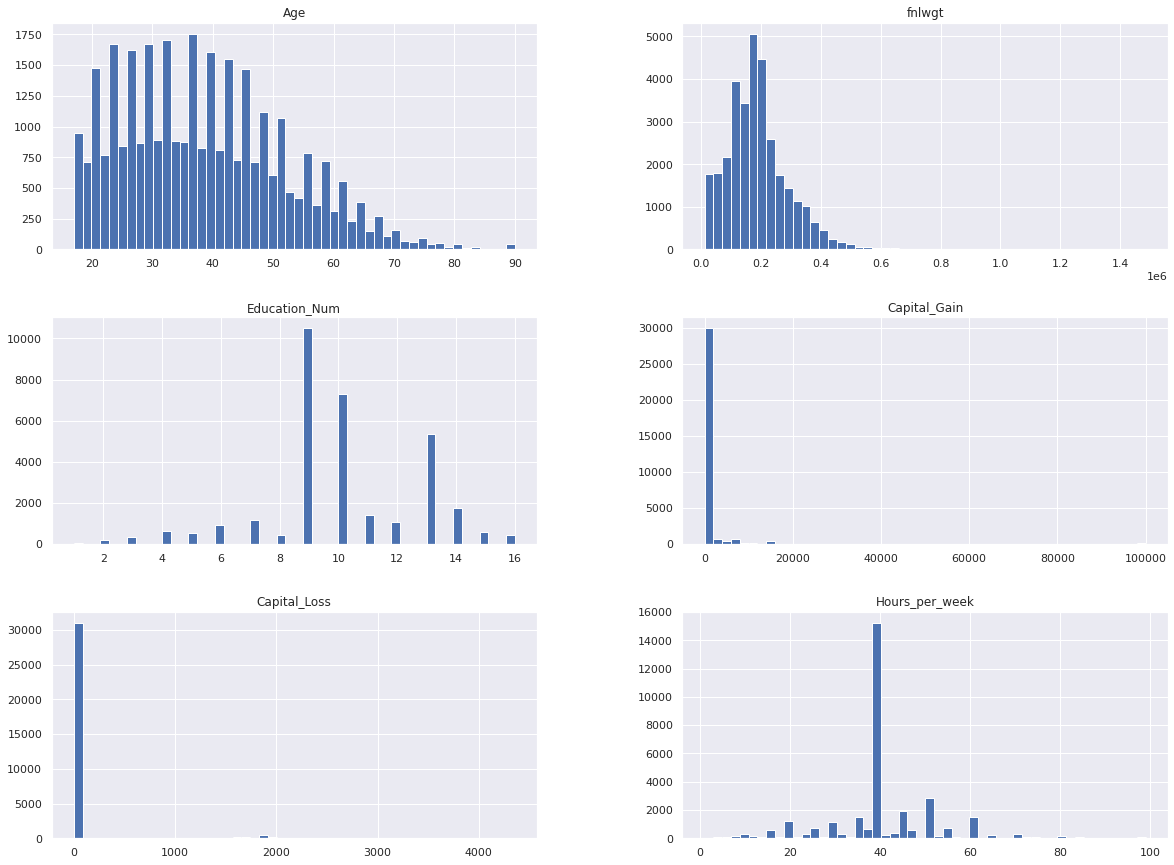

In [395]:
data.hist(bins=50,figsize=(20,15))
plt.show();

**Числовые признаки**

---


**AGE**

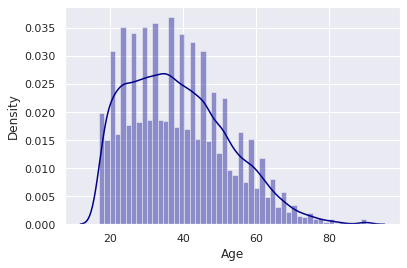

In [396]:
sns.distplot(x=data['Age'], axlabel='Age', color='darkblue')

In [397]:
print(len(data[(data['Age'] > 16) & (data['Age'] <= 25)]))
print(len(data[(data['Age'] > 25) & (data['Age'] <= 32)]))
print(len(data[(data['Age'] > 32) & (data['Age'] <= 40)]))
print(len(data[(data['Age'] > 40) & (data['Age'] <= 50)]))
print(len(data[(data['Age'] > 50)]))

6411
5877
6830
6983
6460


**FNLWGT (Final Weight)**

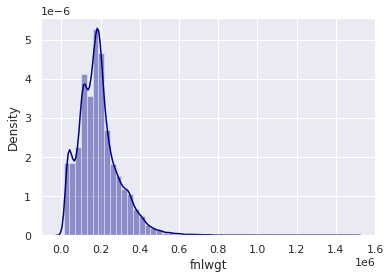

In [398]:
sns.distplot(x=data['fnlwgt'], axlabel='fnlwgt', color='darkblue');

**Education Num**

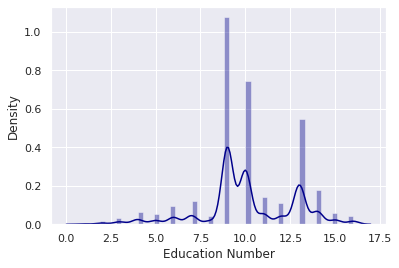

In [399]:
sns.distplot(x = data['Education_Num'], axlabel='Education Number', color = 'darkblue')

**Capital Gain**

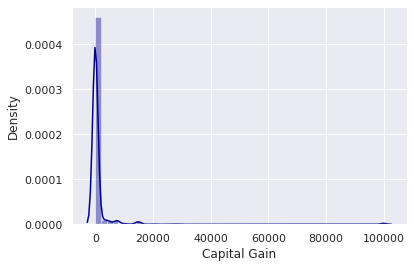

In [400]:
sns.distplot(x = data['Capital_Gain'], axlabel='Capital Gain', color = 'darkblue')

**Capital Loss**

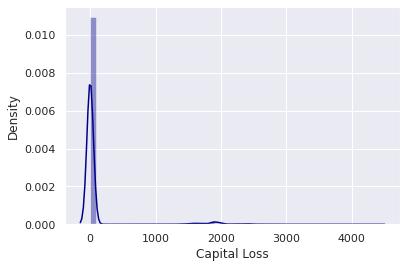

In [401]:
sns.distplot(x = data['Capital_Loss'], axlabel='Capital Loss', color = 'darkblue')

Ранее в результатах describe() мы увидели, что fnlwgt, прирост капитала и потеря капитала смещены вправо. Данный график это подтверждает.

**Hours_per_week**

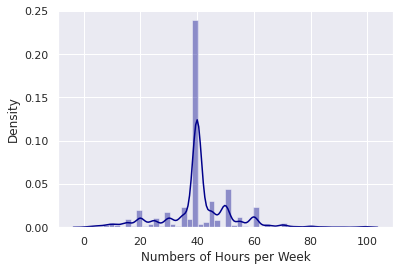

In [402]:
sns.distplot(x = data['Hours_per_week'], axlabel='Numbers of Hours per Week', color = 'darkblue')

**Разделим категориальные и числовые признаки**

In [403]:
numerical_var = [col for col in data.columns if data[col].dtype != object]
categorical_var = [col for col in data.columns if data[col].dtype == object]
print(numerical_var)
print(categorical_var)

['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']
['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Target']


**Категориальные признаки**

---



In [404]:
categorical_var

['Workclass',
 'Education',
 'Martial_Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Country',
 'Target']

**Target**

In [405]:
data['Target'] = data['Target'].apply(lambda x:x.replace("<=50K", "0"))
data['Target'] = data['Target'].apply(lambda x:x.replace(">50K", "1"))
data['Target'] = data['Target'].astype(int)

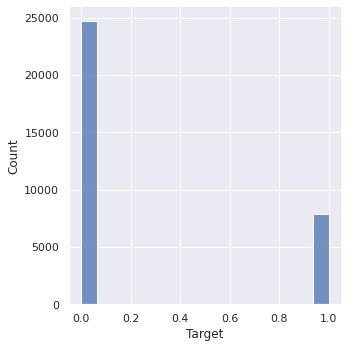

In [406]:
sns.displot(x = data['Target'])

In [407]:
[(i, data[i].unique()) for i in categorical_var]

[('Workclass',
  array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
         ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
         ' Never-worked'], dtype=object)),
 ('Education', array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
         ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
         ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
         ' Preschool', ' 12th'], dtype=object)),
 ('Martial_Status',
  array([' Never-married', ' Married-civ-spouse', ' Divorced',
         ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
         ' Widowed'], dtype=object)),
 ('Occupation',
  array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
         ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
         ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
         ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
         ' Priv-house-serv'], dtype=object)),
 ('Relati

**Workclass**

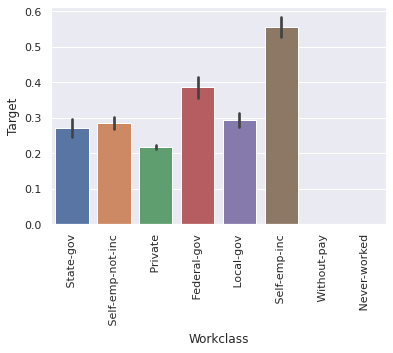

In [408]:
sns.barplot(x = 'Workclass', y = 'Target', data = data)
plt.xticks(rotation = 90);

**Education**

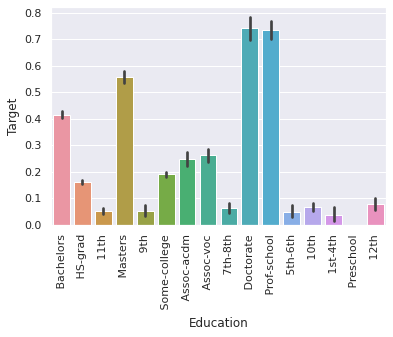

In [409]:
sns.barplot(x = data['Education'], y = data['Target'])
plt.xticks(rotation = 90);

In [410]:
len(data[(data['Education'] == 'Preschool') & (data['Target'] == 0)])

0

**Marital Status**

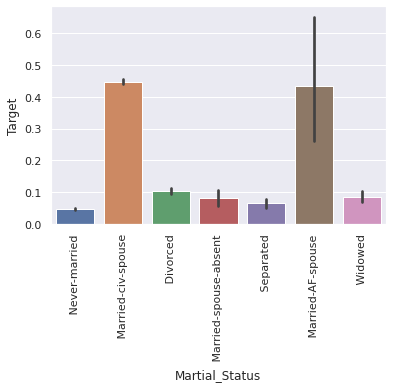

In [411]:
sns.barplot(x = 'Martial_Status', y = 'Target', data = data)
plt.xticks(rotation = 90);

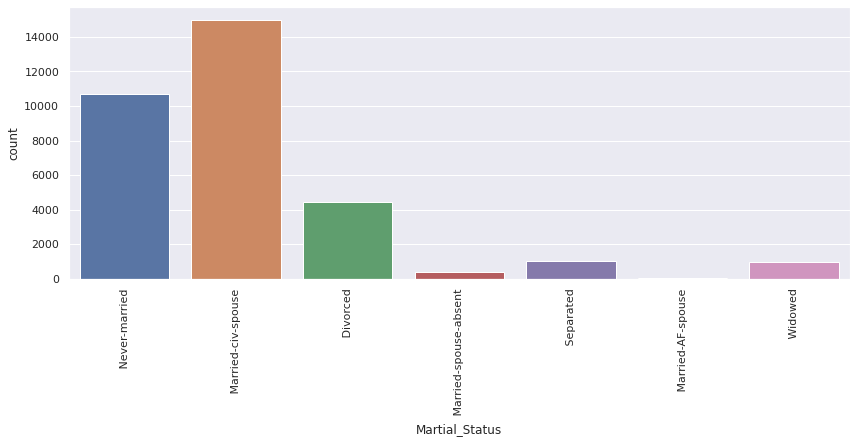

In [412]:
plt.figure(figsize = (14,5))

sns.countplot(x = 'Martial_Status', data = data);
plt.xticks(rotation = 90);

**Relationship**

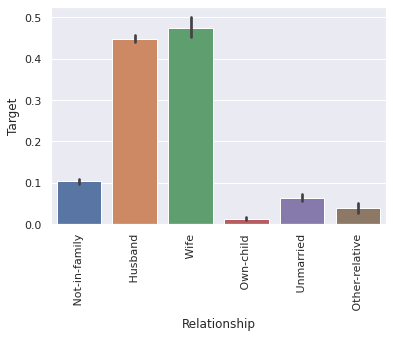

In [413]:
sns.barplot(x = 'Relationship', y = 'Target', data = data)
plt.xticks(rotation = 90);

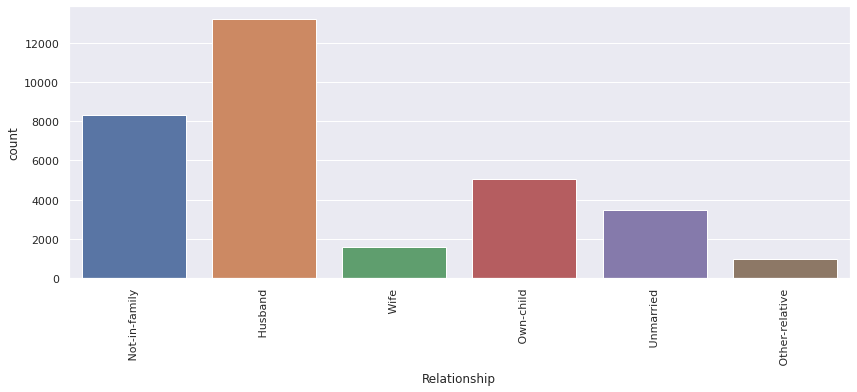

In [414]:
plt.figure(figsize = (14,5))

sns.countplot(x = 'Relationship', data = data);
plt.xticks(rotation = 90);

**Occupation**

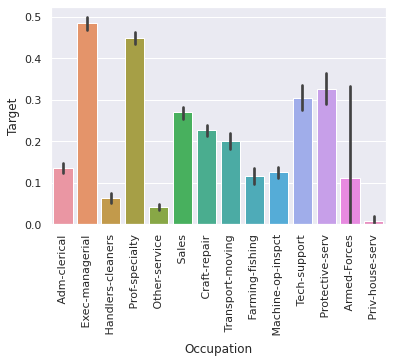

In [415]:
sns.barplot(x = 'Occupation', y = 'Target', data = data)
plt.xticks(rotation = 90);

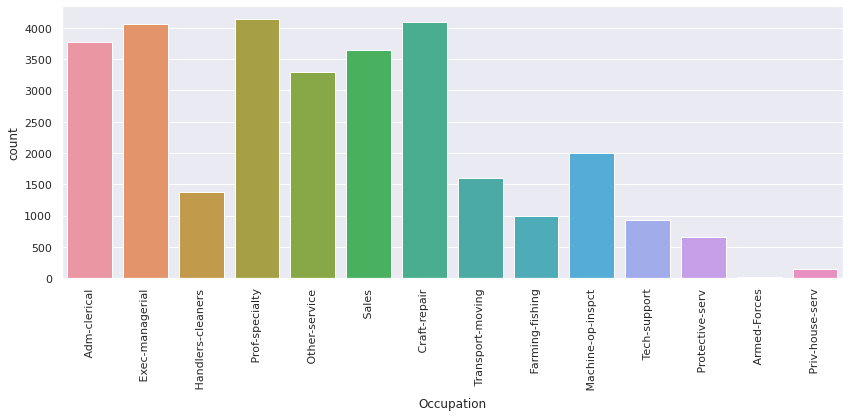

In [416]:
plt.figure(figsize = (14,5))

sns.countplot(x = 'Occupation', data = data);
plt.xticks(rotation = 90);

**Sex**

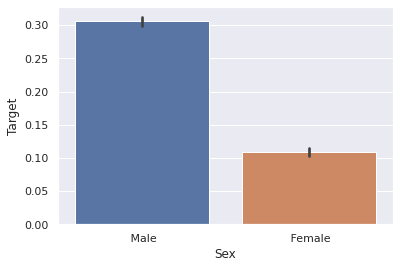

In [417]:
sns.set(style = 'darkgrid', font_scale = 1)
sns.barplot(x = 'Sex', y = 'Target', data = data)

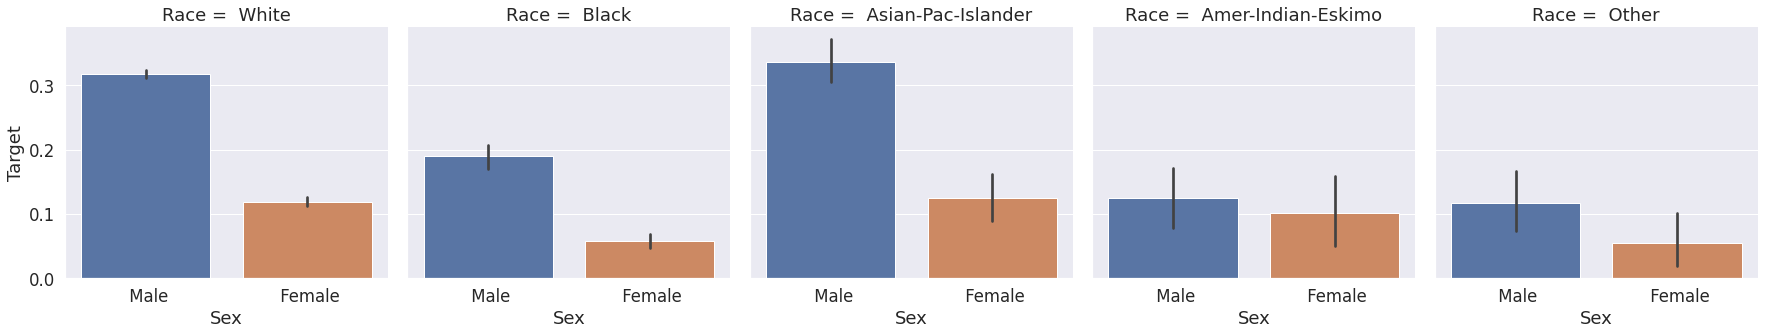

In [418]:
sns.set(style = 'darkgrid', font_scale = 1.5)
sns.catplot(x = 'Sex', y = 'Target', data = data, kind = 'bar', col = 'Race',
            height = 5, aspect = 1)

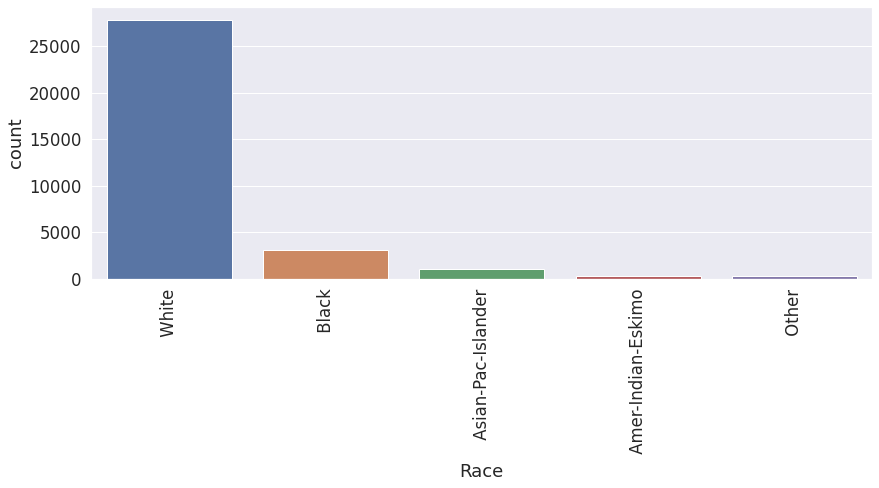

In [419]:
plt.figure(figsize = (14,5))

sns.countplot(x = 'Race', data = data);
plt.xticks(rotation = 90);

In [420]:
data['Race'] = data['Race'].apply(lambda x: 'Other' if x != 'White' else x)

**Country**

Text(0.5, 1.0, 'Country-wise Target')

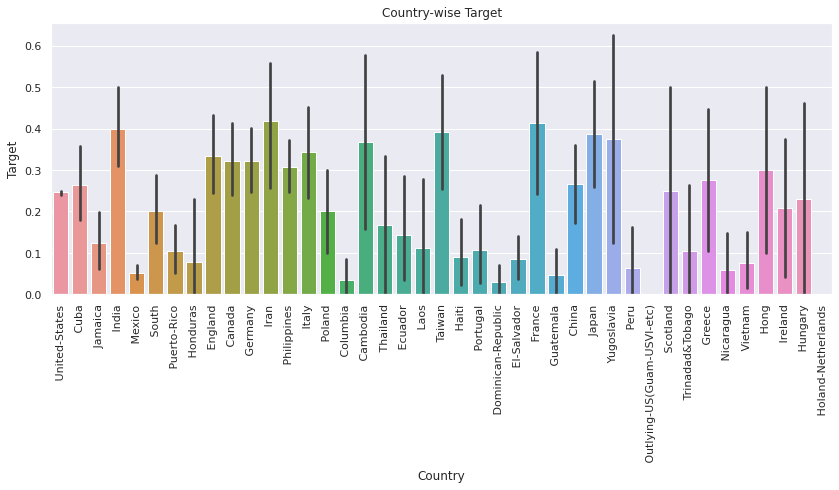

In [421]:
sns.set(style = 'darkgrid', font_scale = 1)
plt.figure(figsize = (14,5))
sns.barplot(x = 'Country', y = 'Target', data = data);
plt.xticks(rotation = 90);
plt.title('Country-wise Target')

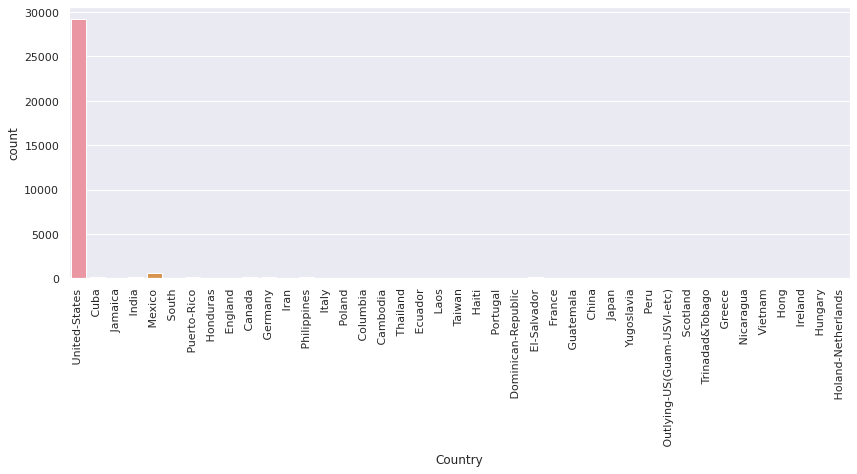

In [422]:
plt.figure(figsize = (14,5))

sns.countplot(x = 'Country', data = data);
plt.xticks(rotation = 90);

**Разработка функций**

**Age**

In [423]:
for i in data:
    data.loc[(data['Age'] > 16) & (data['Age'] <= 25), 'Age'] = 1
    data.loc[(data['Age'] > 25) & (data['Age'] <= 32), 'Age'] = 2
    data.loc[(data['Age'] > 32) & (data['Age'] <= 40), 'Age'] = 3
    data.loc[(data['Age'] > 40) & (data['Age'] <= 50), 'Age'] = 4
    data.loc[data['Age'] > 50, 'Age'] = 5

**Education**

 ('Education', array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
         ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
         ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
         ' Preschool', ' 12th'], dtype=object))

In [424]:
data['Education'] = data['Education'].apply(lambda x: 'School' if x == ' 11th' or x == ' 7th-8th' or x == ' 10th' 
                                              or x == ' 5th-6th' or x == ' 9th' or x == ' 12th' or x == ' 1st-4th' 
                                              or x == ' Preschool' else x)
data['Education'] = data['Education'].apply(lambda x: 'Associate' if x == ' Assoc-acdm' or x == ' Assoc-voc' else x)
education_map = {'School': 1,
             ' HS-grad': 2,
             ' Some-college': 3,
             ' Bachelors': 4,
             ' Prof-school': 5,
             'Associate': 6,
             ' Masters': 7,
             ' Doctorate': 8}
data['Education'] = data['Education'].map(education_map)

Объединяем столбцы увеличение и уменьшение капитала в один (разница капитала).

In [425]:
data['Capital_Diff'] = abs((data['Capital_Gain'] - data['Capital_Loss']))

**Martial status**

In [426]:
data['Martial_Status'] = data['Martial_Status'].apply(lambda x: 'Prev-Married' if (x == 'Widowed' or x == 'Divorced' or x == 'Separated') else x)
data['Martial_Status'] = data['Martial_Status'].apply(lambda x: 'Married' if (x == 'Married-civ-spouse' or x == 'Married-spouse-absent' or x == 'Married-AF-spouse') else x)

**Workclass**

In [427]:
data['Workclass'] = data['Workclass'].apply(lambda x: 'No income' if x == 'Never-worked' or x == 'Without-pay'
                                            else x)

Проверяем пустые ячейки

In [428]:
data.isnull().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education_Num        0
Martial_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_per_week       0
Country            583
Target               0
Capital_Diff         0
dtype: int64

In [429]:
data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [430]:
data['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [431]:
data['Country'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [432]:
def data_fillna(data):
    data['Workclass'] = data['Workclass'].fillna(data['Workclass'].mode()[0])
    data['Occupation'] = data['Occupation'].fillna("null")
    data['Country'] = data["Country"].fillna(data['Country'].mode()[0])
    return data

data = data_fillna(data)

data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education_Num     0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_week    0
Country           0
Target            0
Capital_Diff      0
dtype: int64

In [433]:
data.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num',
       'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Country', 'Target',
       'Capital_Diff'],
      dtype='object')

In [434]:
data['Country'] = data['Country'].apply(lambda x: 'Other' if x != 'United-States' else x)

**Обработка асимметрии**

In [435]:
data['Capital_Gain'] = np.log1p(data['Capital_Gain'])
data['Capital_Loss'] = np.log1p(data['Capital_Loss'])
# data['capital_diff'] = np.log1p(data['capital_diff'])
data['fnlwgt'] = 1/(data['fnlwgt'])

In [436]:
data.describe()

,Age,fnlwgt,Education,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Capital_Diff
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,3.036977,7.914946e-06,3.116827,10.080679,0.734621,0.350305,40.437456,0.240810,1164.952673
std,1.405276,7.043365e-06,1.705080,2.572720,2.454738,1.584581,12.347429,0.427581,7383.545530
min,1.000000,6.735345e-07,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,4.218502e-06,2.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,3.000000,5.606764e-06,3.000000,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,4.000000,8.487019e-06,4.000000,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,5.000000,8.140008e-05,8.000000,16.000000,11.512925,8.379539,99.000000,1.000000,99999.000000


In [437]:
data

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target,Capital_Diff
0,3,State-gov,0.000013,4,13,Never-married,Adm-clerical,Not-in-family,Other,Male,7.684784,0.0,40,Other,0,2174
1,4,Self-emp-not-inc,0.000012,4,13,Married-civ-spouse,Exec-managerial,Husband,Other,Male,0.000000,0.0,13,Other,0,0
2,3,Private,0.000005,2,9,Divorced,Handlers-cleaners,Not-in-family,Other,Male,0.000000,0.0,40,Other,0,0
3,5,Private,0.000004,1,7,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,0.000000,0.0,40,Other,0,0
4,2,Private,0.000003,4,13,Married-civ-spouse,Prof-specialty,Wife,Other,Female,0.000000,0.0,40,Other,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,2,Private,0.000004,6,12,Married-civ-spouse,Tech-support,Wife,Other,Female,0.000000,0.0,38,Other,0,0
32557,3,Private,0.000006,2,9,Married-civ-spouse,Machine-op-inspct,Husband,Other,Male,0.000000,0.0,40,Other,1,0
32558,5,Private,0.000007,2,9,Widowed,Adm-clerical,Unmarried,Other,Female,0.000000,0.0,40,Other,0,0
32559,1,Private,0.000005,2,9,Never-married,Adm-clerical,Own-child,Other,Male,0.000000,0.0,20,Other,0,0


**Корреляция**

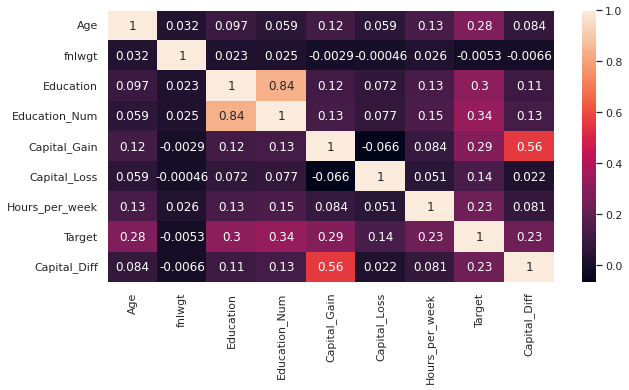

In [438]:
plt.figure(figsize = (10, 5))
sns.heatmap(data.corr(), annot = True)

Образование и номер образования сильно коррелируют друг с другом. Поэтому мы должны отбросить один из них, чтобы оценить значимость и уникальность переменной.

**Разделение данных**

In [439]:
y = data['Target']
X = data.drop('Target', axis = 1)

In [440]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2) 

In [441]:
print(y.shape, y_test.shape, y_train.shape)

(32561,) (6513,) (26048,)


In [442]:
category_var = [col for col in X.columns if X[col].dtypes == object]
category_var

['Workclass',
 'Martial_Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Country']

In [443]:
numeric_var = [col for col in X.columns if X[col].dtypes != object]
numeric_var

['Age',
 'fnlwgt',
 'Education',
 'Education_Num',
 'Capital_Gain',
 'Capital_Loss',
 'Hours_per_week',
 'Capital_Diff']

**Мульти-корреляция**

Имеется наличие мультиколлинеарности, если значение VIF > 10.

In [444]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [445]:
dt = X[numeric_var]
calc_vif(dt)

,variables,VIF
0,Age,5.341668
1,fnlwgt,2.215278
2,Education,11.404709
3,Education_Num,27.156252
4,Capital_Gain,1.628696
5,Capital_Loss,1.069909
6,Hours_per_week,10.049982
7,Capital_Diff,1.504166


Удалим Education_Num

In [446]:

X = X.drop('Education_Num', axis = 1)
numeric_var = [col for col in X.columns if X[col].dtypes != object]
numeric_var

['Age',
 'fnlwgt',
 'Education',
 'Capital_Gain',
 'Capital_Loss',
 'Hours_per_week',
 'Capital_Diff']

In [447]:
dt = X[numeric_var]
calc_vif(dt)

,variables,VIF
0,Age,5.001321
1,fnlwgt,2.146756
2,Education,4.095642
3,Capital_Gain,1.628624
4,Capital_Loss,1.069909
5,Hours_per_week,6.573519
6,Capital_Diff,1.504145


In [448]:
#!pip install category_encoders

**Transformers**

In [449]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [450]:
cat_attributes = [col for col in X_train.columns if X_train[col].dtype == "object"]
num_attributes = [col for col in X_train.columns if X_train[col].dtypes != object ]

In [451]:
numerical_transformer = SimpleImputer(strategy='constant')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

**Preprocessing**



In [452]:
full_pipeline = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_attributes),
        ('cat', categorical_transformer, cat_attributes)
    ])

In [453]:
data_num_transformed = full_pipeline.fit_transform(X_train)

In [454]:
data_num_transformed

array([[3.00000000e+00, 5.30304236e-06, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [5.00000000e+00, 9.52290258e-06, 4.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 6.39124655e-06, 2.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [2.00000000e+00, 9.57331725e-06, 4.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [5.00000000e+00, 3.72162263e-06, 2.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.69253423e-05, 4.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

**Learning information**

In [455]:
from sklearn.metrics import euclidean_distances, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)

**Cross-validation**

In [456]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [457]:
def display_scores(scores):
    print("Оценки:", scores)
    print("Среднее:", scores.mean())
    print("Стандартное отклонение:", scores.std())

**Linear Regression**

In [458]:
from sklearn.linear_model import LinearRegression

In [459]:
from sklearn import metrics

In [460]:
import pickle

In [461]:
model = LinearRegression()
model.fit(data_num_transformed, y_train)
y_pred = model.predict(full_pipeline.fit_transform(X_test))

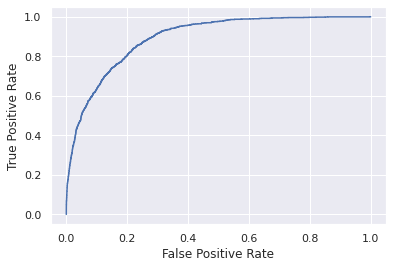

In [462]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

#create ROC curve
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

In [463]:
mse = mean_squared_error(y_test, y_pred)
print(np.sqrt(mse))
scores = cross_val_score(model, data_num_transformed, y_train, scoring='neg_mean_squared_error')
display_scores(np.sqrt(-scores))

0.3359752777516532
Оценки: [0.33139798 0.33615812 0.34006371 0.33954562 0.33796293]
Среднее: 0.3370256748463205
Стандартное отклонение: 0.0031267171486708822


In [464]:
filename = open('LinearRegression.pkl', 'wb')
pickle.dump(model, filename)
filename.close()

**SVM (Support Vector Machines)**

In [465]:
from sklearn.svm import SVC

In [466]:
model = SVC()
model.fit(data_num_transformed, y_train)
y_pred = model.predict(full_pipeline.fit_transform(X_test))

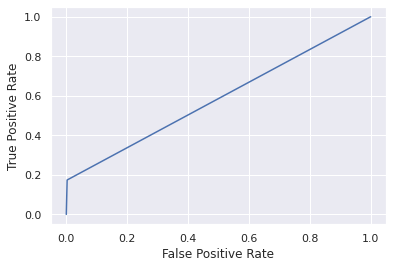

In [467]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

#create ROC curve
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

In [378]:
mse = mean_squared_error(y_test, y_pred)
print(np.sqrt(mse))
scores = cross_val_score(model, data_num_transformed, y_train, scoring='neg_mean_squared_error')
display_scores(np.sqrt(-scores))

0.4366869954703223
Оценки: [0.44999467 0.44871324 0.450421   0.45174094 0.44725652]
Среднее: 0.4496252741869647
Стандартное отклонение: 0.0015289532564638927


In [379]:
filename = open('SVM.pkl', 'wb')
pickle.dump(model, filename)
filename.close()

**KNN**

In [380]:
from sklearn.neighbors import KNeighborsClassifier

In [381]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(data_num_transformed, y_train)
y_pred = model.predict(full_pipeline.fit_transform(X_test))

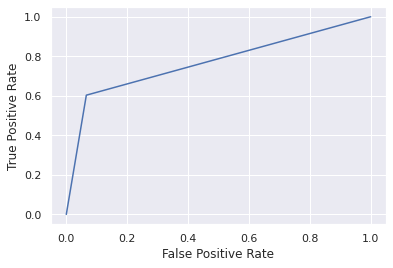

In [382]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

#create ROC curve
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

In [383]:
mse = mean_squared_error(y_test, y_pred)
print(np.sqrt(mse))
scores = cross_val_score(model, data_num_transformed, y_train, scoring='neg_mean_squared_error')
display_scores(np.sqrt(-scores))

0.3760445302286392
Оценки: [0.38293743 0.37585475 0.37865303 0.38547241 0.38121568]
Среднее: 0.3808266622010124
Стандартное отклонение: 0.0033356926524638333


In [384]:
filename = open('KNeighborsClassifier.pkl', 'wb')
pickle.dump(model, filename)
filename.close()

**GaussianNB**

In [385]:
from sklearn.naive_bayes import GaussianNB

In [493]:
model = GaussianNB()
model.fit(data_num_transformed, y_train)
y_pred = model.predict(full_pipeline.fit_transform(X_test))

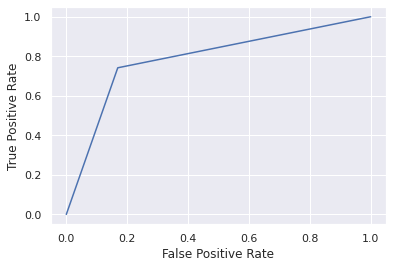

In [494]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

#create ROC curve
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

In [387]:
mse = mean_squared_error(y_test, y_pred)
print(np.sqrt(mse))
scores = cross_val_score(model, data_num_transformed, y_train, scoring='neg_mean_squared_error')
display_scores(np.sqrt(-scores))

0.4352783240724711
Оценки: [0.42656509 0.42363023 0.43215303 0.42907393 0.42435003]
Среднее: 0.4271544606828369
Стандартное отклонение: 0.0031401395426903845


In [388]:
filename = open('GaussianNB.pkl', 'wb')
pickle.dump(model, filename)
filename.close()

**Random Forest**

In [468]:
from sklearn.metrics import classification_report, accuracy_score

In [488]:
model = RandomForestClassifier().fit(data_num_transformed, y_train)
y_pred = model.predict(full_pipeline.fit_transform(X_test))

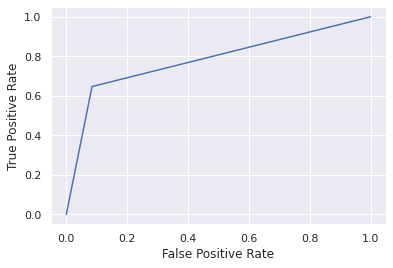

In [489]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

#create ROC curve
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

In [490]:
mse = mean_squared_error(y_test, y_pred)
print(np.sqrt(mse))
scores = cross_val_score(model, data_num_transformed, y_train, scoring='neg_mean_squared_error')
display_scores(np.sqrt(-scores))

0.3819189991477592
Оценки: [0.39381007 0.39307831 0.39258971 0.38547241 0.38372536]
Среднее: 0.3897351723873547
Стандартное отклонение: 0.004247792302798225


In [491]:
filename = open('RandomForestClassifier.pkl', 'wb')
pickle.dump(model, filename)
filename.close()